In [ ]:
!pip install pyvi 
!pip install underthesea

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
import pandas as pd 
import numpy as np 
import unicodedata 
import regex 
from pyvi import ViTokenizer
import random 
from string import punctuation
import regex as re
from underthesea import word_tokenize
import seaborn as sns
from matplotlib import pyplot as plt 

In [ ]:
!unzip /content/drive/MyDrive/Viettel/Data.zip

In [ ]:
!cp /content/drive/MyDrive/Viettel/stopword.txt /content/

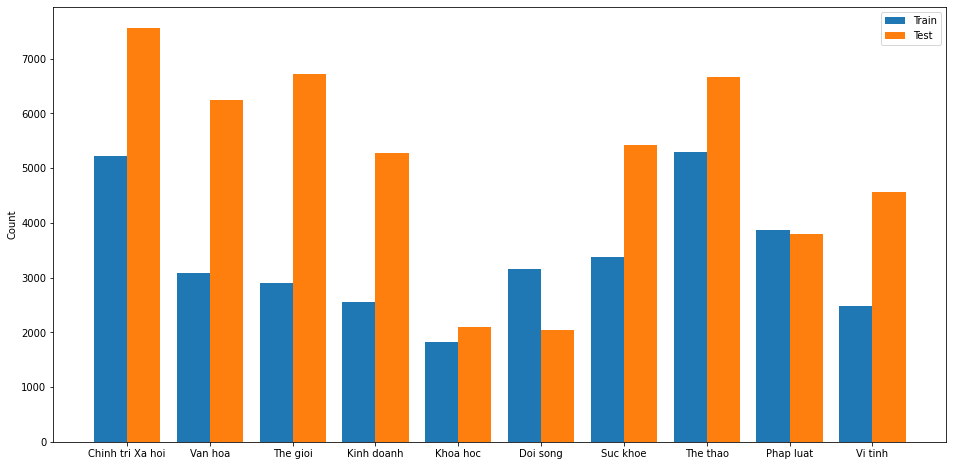

<Figure size 432x288 with 0 Axes>

In [ ]:
path_train="/content/Data/10Label/Train_Full"
path_test="/content/Data/10Label/Test_Full"
labels=os.listdir("/content/Data/10Label/Train_Full")
train_labels=[]
test_labels=[]
for label in labels:
  train_labels.append(len(os.listdir(path_train+'/'+label)))
  test_labels.append(len(os.listdir(path_test+'/'+label)))

plt.figure(figsize=(16,8))
x_axis=np.arange(len(labels))
plt.bar(x_axis-0.2,train_labels,width=0.4,label='Train')
plt.bar(x_axis+0.2,test_labels,width=0.4,label='Test')
plt.legend()
plt.xticks(x_axis,labels)
plt.ylabel("Count")
plt.show()
plt.savefig("data.png")

In [ ]:
path_10_label="/content/Data/10Label"

In [ ]:
#convert text to unicode composed 
def convert_unicode(text):
  return unicodedata.normalize("NFC",text)

def tokenizer(text):
  #return ViTokenizer.tokenize(text)  
  return word_tokenize(text,format="text")  

def remove_redundancy(text):
  text=re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',text)
  new_punctuation=punctuation.replace('_','')
  table=str.maketrans('','',new_punctuation)
  text=text.translate(table)
  text=re.sub("\s\s+"," ",text)
  return text

In [ ]:
bang_nguyen_am= [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]

nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)
def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word
 
    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word
 
    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            return ''.join(chars)
 
    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
        else:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    return ''.join(chars)
 
 
def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True
 
 
def chuan_hoa_dau_cau_tieng_viet(sentence):
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
      '''
      regex.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)',r'\1/\2/\3',"!xin!!!").split('/')
      ==> result: ['!', 'xin', '!!!']
      '''
        cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)
 

In [ ]:
# file_name=random.choice(list_file)
# file=open("/content/Data/10Label/Test_Full/Chinh tri Xa hoi"+"/"+file_name,"r",encoding="utf-16")
# data=file.read()

In [ ]:
# data1=process(data)
# print(data1.split(' '))

In [ ]:
def process_data(text):
  text=convert_unicode(text)
  text=chuan_hoa_dau_cau_tieng_viet(text)
  text=tokenizer(text)
  text=remove_redundancy(text)
  words=[]
  for word in text.strip().split(' '):
    if len(word)<3 and word.isnumeric()==False:
      continue
    words.append(word)
  text=' '.join(words)
  return text

In [ ]:
def preprocessing(folder_data_raw,folder_data,file_data):
  paths=os.path.join(path_10_label,folder_data_raw)
  file_s=open('/content/{}/{}.csv'.format(folder_data,file_data),'w')
  file_s.write('text,label\n')
  for idx,label in enumerate(os.listdir(paths)):
    path_to_label=os.path.join(paths,label)
    for file_name in os.listdir(path_to_label):
      file=open(path_to_label+'/'+file_name,"r",encoding="utf-16")
      text=file.read()
      text=process_data(text)
      file_s.write(f"{text},{idx}\n")
    
    print(f"Done {label}")

  file_s.close()

In [ ]:
a="Ngoài đường hiện có ít nhất 20% người không đeo khẩu trang. Người không đeo không những tự rước bệnh vào mình mà còn nguy cơ lây cho người khác. Đeo khẩu trang hơi cực tí thôi nhưng đi đâu cũng nên đeo để giữ an toàn"
a=process_data(a)
print(a)

In [ ]:
!rm -r DataTrain
!mkdir DataTrain 
preprocessing('Train_Full','DataTrain','train')

Done Chinh tri Xa hoi
Done Van hoa
Done The gioi
Done Kinh doanh
Done Khoa hoc
Done Doi song
Done Suc khoe
Done The thao
Done Phap luat
Done Vi tinh


In [ ]:
preprocessing('Test_Full','DataTrain','test')

Done Chinh tri Xa hoi
Done Van hoa
Done The gioi
Done Kinh doanh
Done Khoa hoc
Done Doi song
Done Suc khoe
Done The thao
Done Phap luat
Done Vi tinh


In [ ]:
data_train=pd.read_csv('DataTrain/train.csv')
data_test=pd.read_csv('DataTrain/test.csv')

In [ ]:
!cp /content/DataTrain/train.csv /content/drive/MyDrive/Viettel
!cp /content/DataTrain/test.csv /content/drive/MyDrive/Viettel

In [ ]:
data_train

,text,label
0,không du_khách vùng_biển xảy sóng_thần trao_đổ...,0
1,vua cầu_treo mới 42 tuổi anh phạm ngọc quý hưn...,0
2,chuẩn_bị hàng độc chợ tết người dân sa_đéc man...,0
3,lên lộ_trình triển_khai việc phân_giới cắm_mốc...,0
4,tàu phương nam 02 đâm chìm trên biển 0 giờ 30 ...,0
...,...,...
33754,mua máy xách tay được tặng ipod 1 trong chương...,9
33755,vietnam computerworld expo 2004 sôi_động mới_m...,9
33756,lĩnh hack phòng_thí_nghiệm hạt_nhân của hôm_qu...,9
33757,xử_lý file trùng_lặp bằng xplorer2 lite cứng n...,9


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


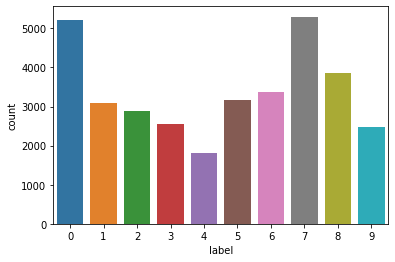

In [ ]:
sns.countplot(data_train.label)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer 
tokenize=Tokenizer(
    filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',
    lower=True
)
tokenize.fit_on_texts(data_train.text)
print(tokenize.word_index)

{'của': 1, 'các': 2, 'trong': 3, 'được': 4, 'cho': 5, 'một': 6, 'không': 7, 'với': 8, 'người': 9, 'những': 10, 'khi': 11, 'này': 12, 'cũng': 13, 'đến': 14, 'vào': 15, 'tôi': 16, 'phải': 17, 'anh': 18, 'nhiều': 19, 'như': 20, 'năm': 21, 'nhưng': 22, 'trên': 23, 'ông': 24, 'tại': 25, 'lại': 26, 'sau': 27, 'làm': 28, 'còn': 29, 'hơn': 30, 'chỉ': 31, 'theo': 32, 'thì': 33, '2': 34, '1': 35, 'có_thể': 36, 'ngày': 37, 'trước': 38, 'rất': 39, 'mình': 40, 'biết': 41, 'việc': 42, 'hai': 43, '3': 44, 'bạn': 45, 'đang': 46, 'mới': 47, 'nhà': 48, 'nam': 49, 'nhất': 50, 'nước': 51, 'vẫn': 52, 'nên': 53, 'đây': 54, 'khác': 55, 'lên': 56, 'nói': 57, 'trận': 58, 'nếu': 59, 'rằng': 60, 'qua': 61, 'đội': 62, 'tới': 63, '4': 64, 'việt': 65, 'lần': 66, '5': 67, 'chưa': 68, 'con': 69, 'hay': 70, 'bằng': 71, 'tháng': 72, 'thấy': 73, 'cùng': 74, 'cao': 75, 'đồng': 76, 'chị': 77, '000': 78, 'thứ': 79, 'điều': 80, 'cuộc': 81, 'nào': 82, 'cần': 83, 'công_ty': 84, 'tiền': 85, 'lớn': 86, 'hoặc': 87, 'nay': 88, '1

In [ ]:
words=tokenize.word_index.keys()

In [ ]:
for word in words:
  if 'cảm' in word:
    print(word)

cảm_thấy
tình_cảm
cảm_giác
cảm_xúc
cảm_nhận
nhạy_cảm
cảm_ơn
thông_cảm
cảm
dũng_cảm
cảm_hứng
trầm_cảm
mặc_cảm
cảm_thông
gợi_cảm
khoái_cảm
đồng_cảm
cảm_động
xúc_cảm
cảm_tình
cảm_ứng
phản_cảm
thiện_cảm
cảm_biến
linh_cảm
vô_cảm
cảm_lạnh
cảm_thụ
cảm_tính
cảm_nghĩ
giao_cảm
truyền_cảm
biểu_cảm
lãnh_cảm
cảm_tưởng
cảm_phục
cảm_mến
cảm_hóa
mẫn_cảm
quả_cảm
ác_cảm
cảm_mạo
đa_cảm
rung_cảm
cảm_tạ
cảm_kích
thương_cảm
cảm_quan
cảm_nắng
nhục_cảm
ngoại_cảm
truyền_cảm_hứng
tự_cảm_thấy
cảm_thán
mỹ_cảm
tâm_tư_tình_cảm
cảm_tử
cảm_giác_thư_giãn
cảm_thức
dũng_cảm_thấy
diễn_cảm
tình_cảm_động
cảm_quang
cảm_thụ_thể
cảm_biến_hình_ảnh
dự_cảm
cảm_thương
nhận_cảm
cảm_giác_thư_thái
cảm_phả
mỹ_cảm_thấy
tình_cảm_hàn
tự_cảm
cảm_khái
gợi_cảm_giác
phức_cảm
cảm_biến_nhiệt
mỹ_cảm_ơn
cảm_tử_quân
cảm_nhiễm
hoài_cảm
thụ_cảm
duy_cảm
cảnh_tình_cảm
truyền_cảm_xúc
gợi_cảm_xúc
tình_cảm_tính_toán
thụ_cảm_thể
tình_cảm_thông_thường
cảm_thông_thường
dũng_cảm_bội_phần
an_dũng_cảm
cảm_châu
quốc_gia_cảm_ơn
nhạy_cảm_tưởng_chừng
tình_cảm_mế